# OSCAR data Analysis notebook

In [1]:
# Import the necessary packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import data_analysis_functions as daf
matplotlib.style.use('seaborn')

C:\Users\amy\AppData\Local\Temp\ipykernel_13056\3696286339.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  matplotlib.style.use('seaborn')


## PRC gains with a RoC detuning

In [2]:
# Read the data file
filename="data/29032023/PR_gains__PRC_RoC.txt"
data_gains=daf.read_gains(filename)

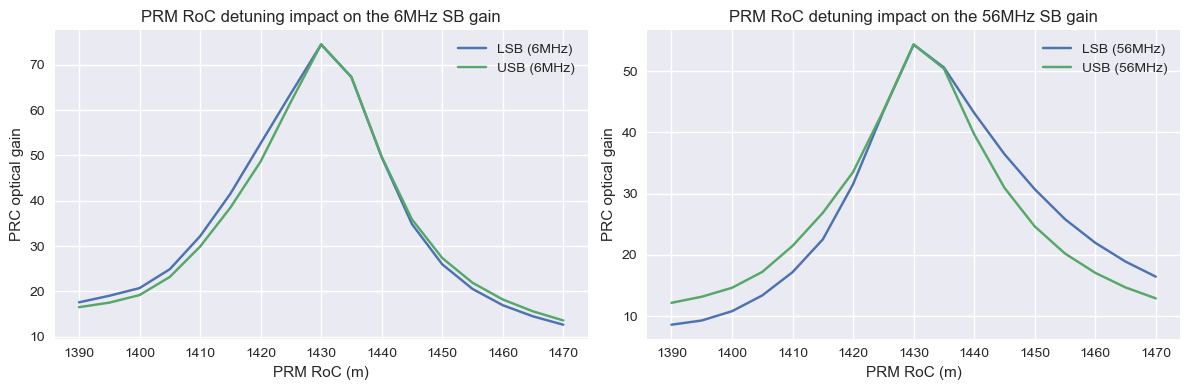

In [3]:
# Create a 1x2 grid of subplots (1 row, 2 columns)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# First plot (LSB (6MHz) and USB (6MHz)) using the first axis
axes[0].plot(data_gains[0], data_gains[1], label="LSB (6MHz)")
axes[0].plot(data_gains[0], data_gains[2], label="USB (6MHz)")
axes[0].set_xlabel("PRM RoC (m)")
axes[0].set_ylabel("PRC optical gain")
axes[0].set_title("PRM RoC detuning impact on the 6MHz SB gain")
axes[0].legend()

# Second plot (LSB (56MHz) and USB (56MHz)) using the second axis
axes[1].plot(data_gains[0], data_gains[3], label="LSB (56MHz)")
axes[1].plot(data_gains[0], data_gains[4], label="USB (56MHz)")
axes[1].set_xlabel("PRM RoC (m)")
axes[1].set_ylabel("PRC optical gain")
axes[1].set_title("PRM RoC detuning impact on the 56MHz SB gain")
axes[1].legend()

# Adjust the layout to avoid overlapping between subplots
plt.tight_layout()

# Display the combined figure with both subplots
plt.show()


**The maximum gain is with a PRM RoC of 1430m.**

## PDs circulating signals with a PRM RoC detuning

In [3]:
# Read the data file
data=[[],[],[],[],[]]
filename="data/29032023/circ_PD__PRC_RoC.txt"
data_PD=daf.read_signals(data, filename)

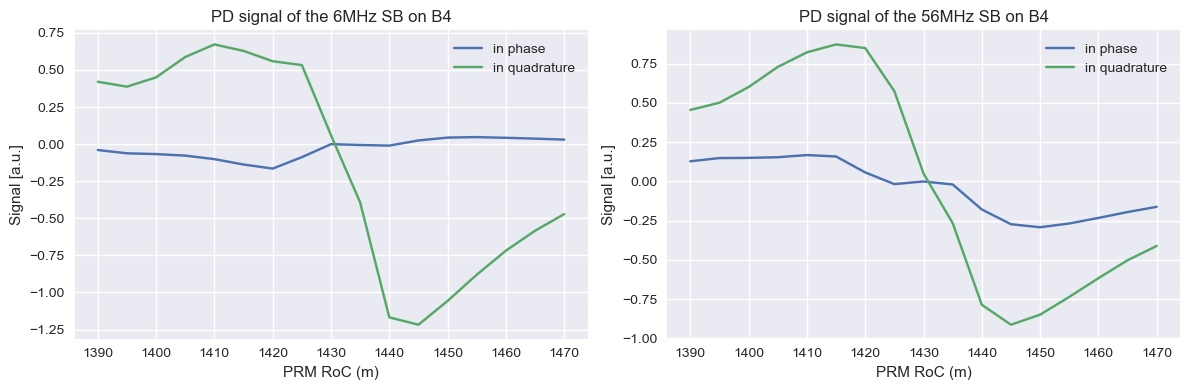

In [5]:
# Create a 1x2 grid of subplots (1 row, 2 columns)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# First plot (LSB (6MHz) and USB (6MHz)) using the first axis
axes[0].plot(data_PD[0], data_PD[1], label="in phase")
axes[0].plot(data_PD[0], data_PD[2], label="in quadrature")
axes[0].set_xlabel("PRM RoC (m)")
axes[0].set_ylabel("Signal [a.u.]")
axes[0].set_title("PD signal of the 6MHz SB on B4")
axes[0].legend()

# Second plot (LSB (56MHz) and USB (56MHz)) using the second axis
axes[1].plot(data_PD[0], data_PD[3], label="in phase")
axes[1].plot(data_PD[0], data_PD[4], label="in quadrature")
axes[1].set_xlabel("PRM RoC (m)")
axes[1].set_ylabel("Signal [a.u.]")
axes[1].set_title("PD signal of the 56MHz SB on B4")
axes[1].legend()

# Adjust the layout to avoid overlapping between subplots
plt.tight_layout()

# Display the combined figure with both subplots
plt.show()

**The signal are at zero when the RoC of PRM is at 1430m.**

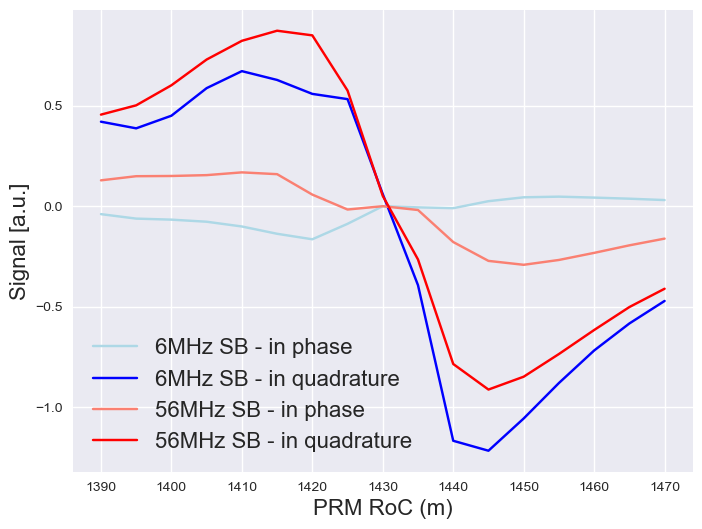

<Figure size 800x600 with 0 Axes>

In [4]:
# Create a single plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot LSB (6MHz) and USB (6MHz) data with specific colors (light and dark blue)
ax.plot(data_PD[0], data_PD[1], color='lightblue', label="6MHz SB - in phase")
ax.plot(data_PD[0], data_PD[2], color='blue', label="6MHz SB - in quadrature")

# Plot LSB (56MHz) and USB (56MHz) data with different colors (light and dark red)
ax.plot(data_PD[0], data_PD[3], color='salmon', label="56MHz SB - in phase")
ax.plot(data_PD[0], data_PD[4], color='red', label="56MHz SB - in quadrature")

# Set labels and title
ax.set_xlabel("PRM RoC (m)", fontsize=16)
ax.set_ylabel("Signal [a.u.]", fontsize=16)
#ax.set_title("PD signal of the 6MHz & 56MHz SB on B4")

# Display the legend
ax.legend(fontsize=16)

# Show the plot
plt.figure(figsize=(8, 6))
plt.show()



## Quads circulating signals with a PRM tilt

In [5]:
# Read the data file
data=[[],[],[],[],[],[],[],[],[]]
filename="data/05042023/circ_quad__PRC_tilt.txt"
data_quad05=daf.read_signals(data, filename)

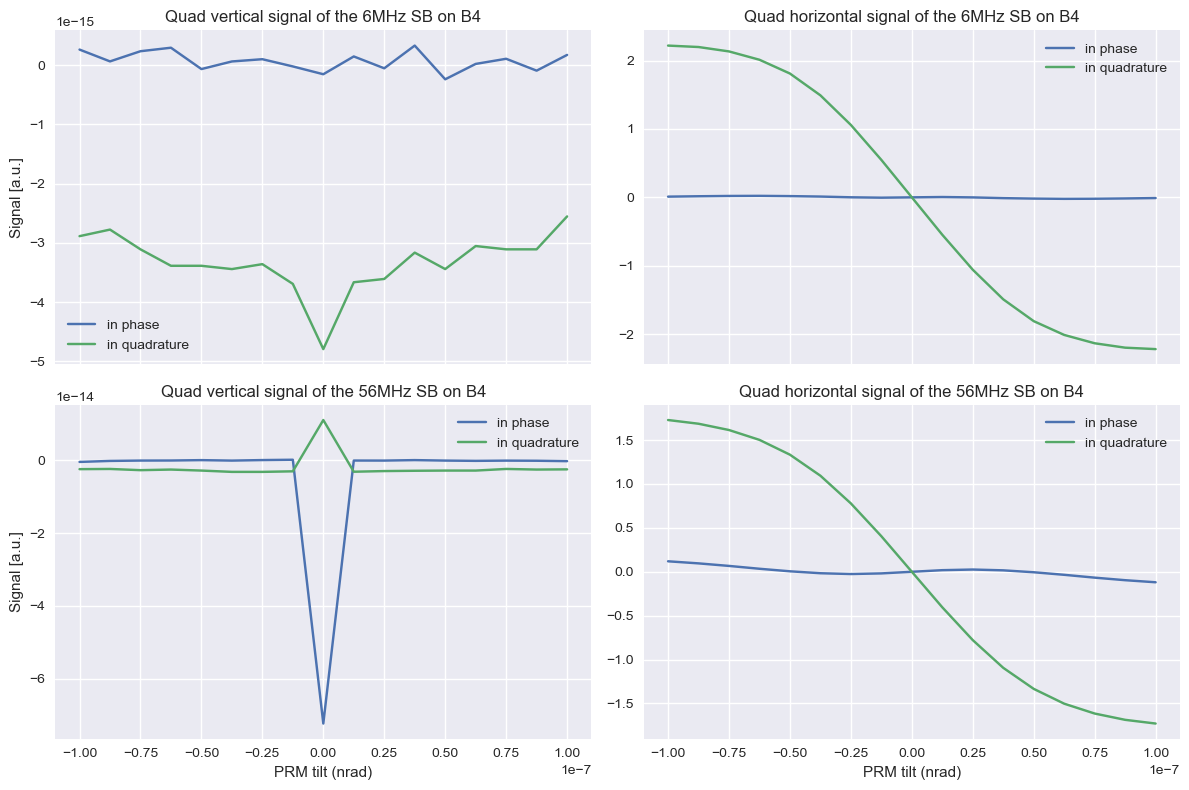

In [7]:
titles = [
    "Quad vertical signal of the 6MHz SB on B4",
    "Quad horizontal signal of the 6MHz SB on B4",
    "Quad vertical signal of the 56MHz SB on B4",
    "Quad horizontal signal of the 56MHz SB on B4"
]

# Create a 2x2 grid of subplots (2 rows, 2 columns) with shared x-axis
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8), sharex=True)

# Iterate through each subplot, row, and column
for i, ax in enumerate(axes.flatten()):
    # Plot the in-phase and in-quadrature data
    ax.plot(data_quad05[0], data_quad05[1 + 2*i], label="in phase")
    ax.plot(data_quad05[0], data_quad05[2 + 2*i], label="in quadrature")
    
    # Set the axis labels and title
    if i // 2 == 1:  # Bottom row plots
        ax.set_xlabel("PRM tilt (nrad)")
    if i % 2 == 0:  # Left column plots
        ax.set_ylabel("Signal [a.u.]")
    ax.set_title(titles[i])
    ax.legend()

# Adjust the layout to avoid overlapping between subplots
plt.tight_layout()

# Display the combined figure with all four subplots
plt.show()



**Since the tilt on PRM is on the horizontal axis the only zero signals are the horizontal ones.**

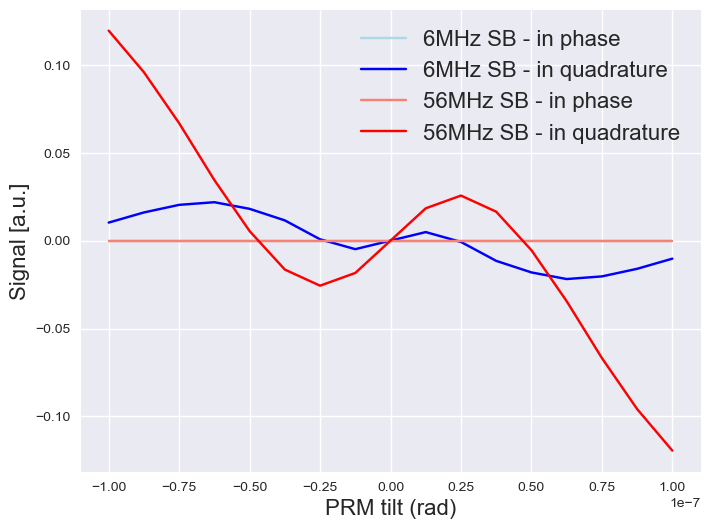

In [6]:
# Titles for the horizontal signals
titles = [
    "6MHz SB - in phase",
    "6MHz SB - in quadrature",
    "56MHz SB - in phase",
    "56MHz SB - in quadrature"
]

# Create a single subplot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot 6MHz in-phase and in-quadrature signals
ax.plot(data_quad05[0], data_quad05[2], color='lightblue', label=titles[0])
ax.plot(data_quad05[0], data_quad05[3], color='blue', label=titles[1])

# Plot 56MHz in-phase and in-quadrature signals
ax.plot(data_quad05[0], data_quad05[6], color='salmon', label=titles[2])
ax.plot(data_quad05[0], data_quad05[7], color='red', label=titles[3])

# Set the axis labels and title
ax.set_xlabel("PRM tilt (rad)", fontsize=16)
ax.set_ylabel("Signal [a.u.]", fontsize=16)
#ax.set_title("In-phase and In-quadrature signals of the 6MHz & 56MHz SB on B4")

# Display the legend
ax.legend(fontsize=16)

# Show the plot
plt.show()




## Quads circulating signals with a PRM RoC detuning and tilt (100nrad)

### Premier test du 06/03/2023

In [8]:
# Read the data file
data=[[],[],[],[],[],[],[],[],[]]
filename="data/06042023/circ_quad__PRC_RoC.txt"
data_quad06=daf.read_signals(data, filename)

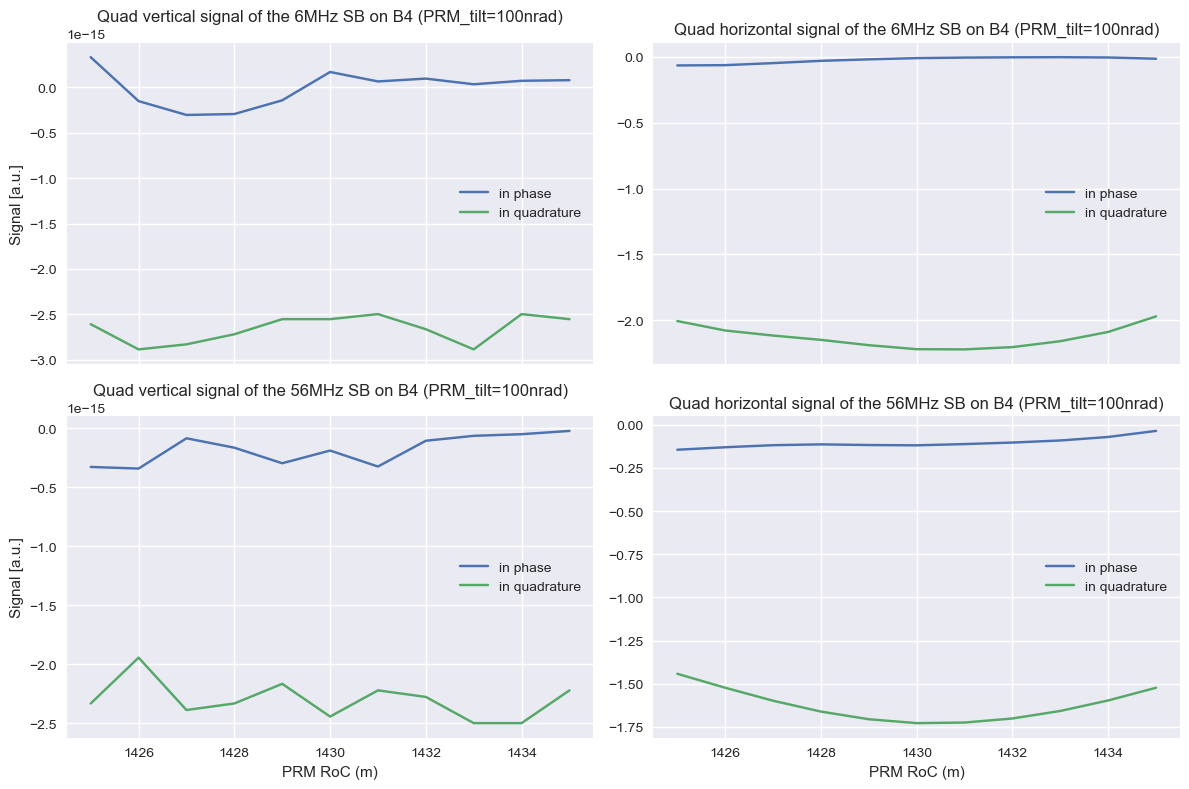

In [9]:
titles = [
    "Quad vertical signal of the 6MHz SB on B4 (PRM_tilt=100nrad)",
    "Quad horizontal signal of the 6MHz SB on B4 (PRM_tilt=100nrad)",
    "Quad vertical signal of the 56MHz SB on B4 (PRM_tilt=100nrad)",
    "Quad horizontal signal of the 56MHz SB on B4 (PRM_tilt=100nrad)"
]

# Create a 2x2 grid of subplots (2 rows, 2 columns) with shared x-axis
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8), sharex=True)

# Iterate through each subplot, row, and column
for i, ax in enumerate(axes.flatten()):
    # Plot the in-phase and in-quadrature data
    ax.plot(data_quad06[0], data_quad06[1 + 2*i], label="in phase")
    ax.plot(data_quad06[0], data_quad06[2 + 2*i], label="in quadrature")
    
    # Set the axis labels and title
    if i // 2 == 1:  # Bottom row plots
        ax.set_xlabel("PRM RoC (m)")
    if i % 2 == 0:  # Left column plots
        ax.set_ylabel("Signal [a.u.]")
    ax.set_title(titles[i])
    ax.legend()

# Adjust the layout to avoid overlapping between subplots
plt.tight_layout()

# Display the combined figure with all four subplots
plt.show()



**The horizontal signals in quadrature are the only ones relevant. Their evolution seems to be simetrical to the zero y axis.**

### Deuxième test du 13/04/2023
Avec l'ajout de la SB à 8MHz.

In [10]:
# Read the data file
data=[[],[],[],[],[],[],[],[],[]]
filename="data/13042023/Quad_RoC.txt"
data_quad13=daf.read_signals(data, filename)

Max difference for 6HP: 0.00019847693224410434
Max difference for 6HQ: 0.006710402422850148
Max difference for 56HP: 0.14270316465568114
Max difference for 56HQ: 1.7331160243363966


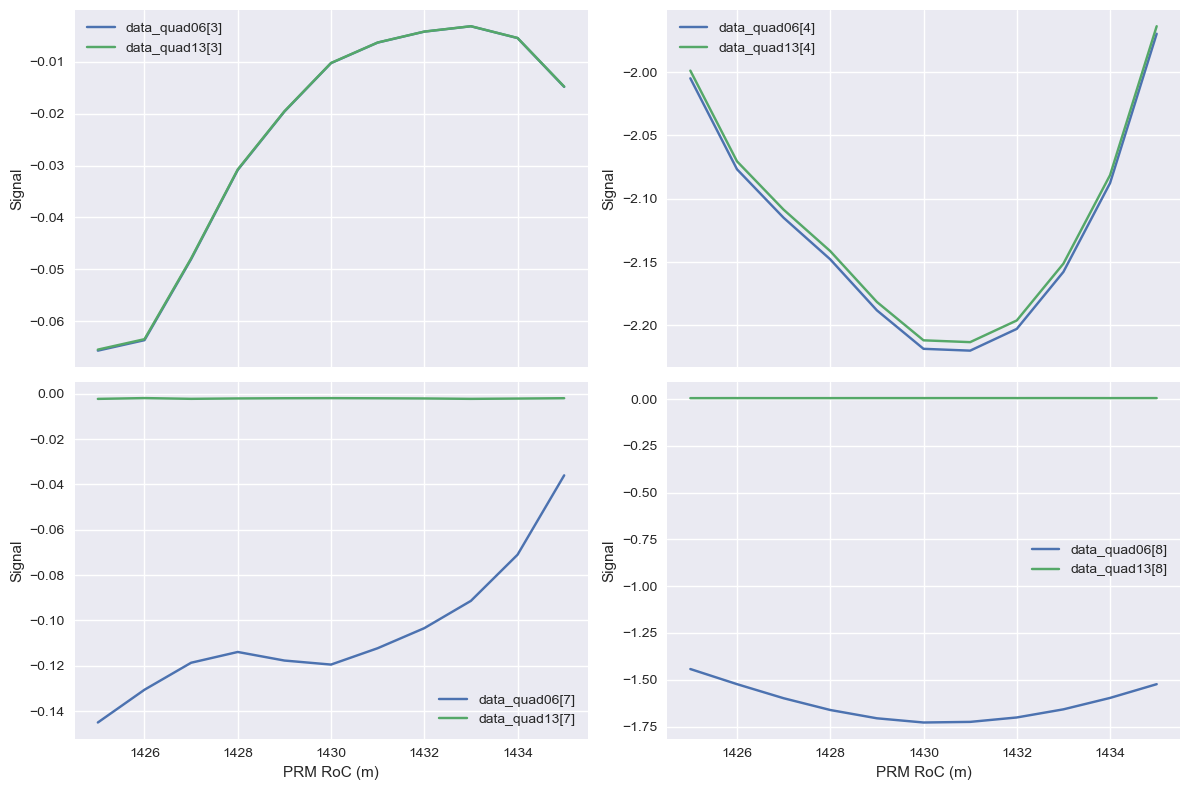

In [11]:
# Calculate the max differences between the data from the 06/04 and the 13/04
max_diffs = []
for i in range(1, 9):
    max_diff = np.max(np.abs(np.subtract(data_quad06[i], data_quad13[i])))
    max_diffs.append(max_diff)

# Define a computer precision threshold
computer_precision = 1e-14

# Define the labels for the max differences
max_diff_labels = ["6VP", "6VQ", "6HP", "6HQ", "56VP", "56VQ", "56HP", "56HQ"]

# Print the max difference value if it is significant
significant_diff_indices = []
for i, (max_diff, label) in enumerate(zip(max_diffs, max_diff_labels)):
    if max_diff > computer_precision:
        print(f"Max difference for {label}:", max_diff)
        significant_diff_indices.append(i)

# Plot the signals with significant differences
if significant_diff_indices:
    n_subplots = len(significant_diff_indices)
    ncols = 2  # Number of columns for subplots
    nrows = int(np.ceil(n_subplots / ncols))

    fig, axes = plt.subplots(nrows, ncols, figsize=(6 * ncols, 4 * nrows), sharex=True)
    axes = axes.flatten()  # Flatten the axes array to simplify indexing

    # Plot the significant differences
    for i, ax in zip(significant_diff_indices, axes[:n_subplots]):
        ax.plot(data_quad06[0], data_quad06[i + 1], label=f'data_quad06[{i + 1}]')
        ax.plot(data_quad06[0], data_quad13[i + 1], label=f'data_quad13[{i + 1}]')
        ax.set_ylabel('Signal')
        ax.legend()

    # Hide the unused subplot axes
    for ax in axes[n_subplots:]:
        ax.axis('off')

    # Set x-labels only for the subplots in the last row
    for ax in axes[-ncols:]:
        ax.set_xlabel('PRM RoC (m)')

    plt.tight_layout()  # Adjust the layout to avoid overlapping
    plt.show()


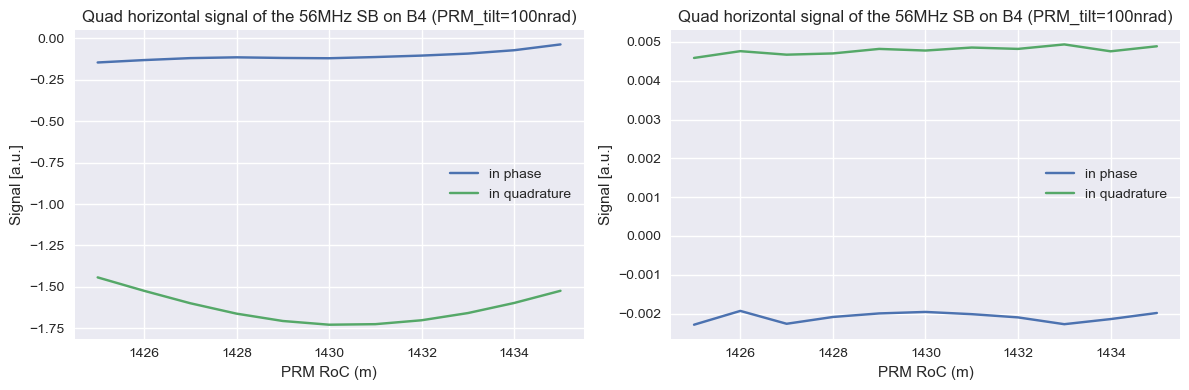

In [12]:
# Plot the very different data
# Create a 1x2 grid of subplots (1 row, 2 columns)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# First plot (LSB (6MHz) and USB (6MHz)) using the first axis
axes[0].plot(data_quad06[0], data_quad06[7], label="in phase")
axes[0].plot(data_quad06[0], data_quad06[8], label="in quadrature")
axes[0].set_xlabel("PRM RoC (m)")
axes[0].set_ylabel("Signal [a.u.]")
axes[0].set_title("Quad horizontal signal of the 56MHz SB on B4 (PRM_tilt=100nrad)")
axes[0].legend()

# Second plot (LSB (56MHz) and USB (56MHz)) using the second axis
axes[1].plot(data_quad13[0], data_quad13[7], label="in phase")
axes[1].plot(data_quad13[0], data_quad13[8], label="in quadrature")
axes[1].set_xlabel("PRM RoC (m)")
axes[1].set_ylabel("Signal [a.u.]")
axes[1].set_title("Quad horizontal signal of the 56MHz SB on B4 (PRM_tilt=100nrad)")
axes[1].legend()

# Adjust the layout to avoid overlapping between subplots
plt.tight_layout()

# Display the combined figure with both subplots
plt.show()

**Notable differences, could be due to the 8MHz SB implementation.**

### Troisième test du 14/04/2023
Suppression de la bande à 8MHz.

In [13]:
# Read the data file
data=[[],[],[],[],[],[],[],[],[]]
filename="data/14042023/Quad_RoC.txt"
data_quad14=daf.read_signals(data, filename)

In [14]:
# Calculate the max differences between the data from the 06/04 and the 13/04
max_diffs = []
for i in range(1, 9):
    max_diff = np.max(np.abs(np.subtract(data_quad06[i], data_quad14[i])))
    max_diffs.append(max_diff)

# Define a computer precision threshold
computer_precision = 1e-14

# Define the labels for the max differences
max_diff_labels = ["6VP", "6VQ", "6HP", "6HQ", "56VP", "56VQ", "56HP", "56HQ"]

# Print the max difference value if it is significant
significant_diff_indices = []
for i, (max_diff, label) in enumerate(zip(max_diffs, max_diff_labels)):
    if max_diff > computer_precision:
        print(f"Max difference for {label}:", max_diff)
        significant_diff_indices.append(i)

# Plot the signals with significant differences
if significant_diff_indices:
    n_subplots = len(significant_diff_indices)
    ncols = 2  # Number of columns for subplots
    nrows = int(np.ceil(n_subplots / ncols))

    fig, axes = plt.subplots(nrows, ncols, figsize=(6 * ncols, 4 * nrows), sharex=True)
    axes = axes.flatten()  # Flatten the axes array to simplify indexing

    # Plot the significant differences
    for i, ax in zip(significant_diff_indices, axes[:n_subplots]):
        ax.plot(data_quad06[0], data_quad06[i + 1], label=f'data_quad06[{i + 1}]')
        ax.plot(data_quad14[0], data_quad14[i + 1], label=f'data_quad14[{i + 1}]')
        ax.set_ylabel('Signal')
        ax.legend()

    # Hide the unused subplot axes
    for ax in axes[n_subplots:]:
        ax.axis('off')

    # Set x-labels only for the subplots in the last row
    for ax in axes[-ncols:]:
        ax.set_xlabel('PRM RoC (m)')

    plt.tight_layout()  # Adjust the layout to avoid overlapping
    plt.show()

**No differences observed. The 8MHz sideband implementation is messing with the observed signals.**

### Quatrième test du 14/04/2023
Rajout de la bande à 8MHz mais en deuxième position.

In [15]:
# Read the data file
data=[[],[],[],[],[],[],[],[],[],[],[],[],[]]
filename="data/14042023/Quad_RoC_with8MHzdata.txt"
data_quad14_with8MHz=daf.read_signals(data, filename)

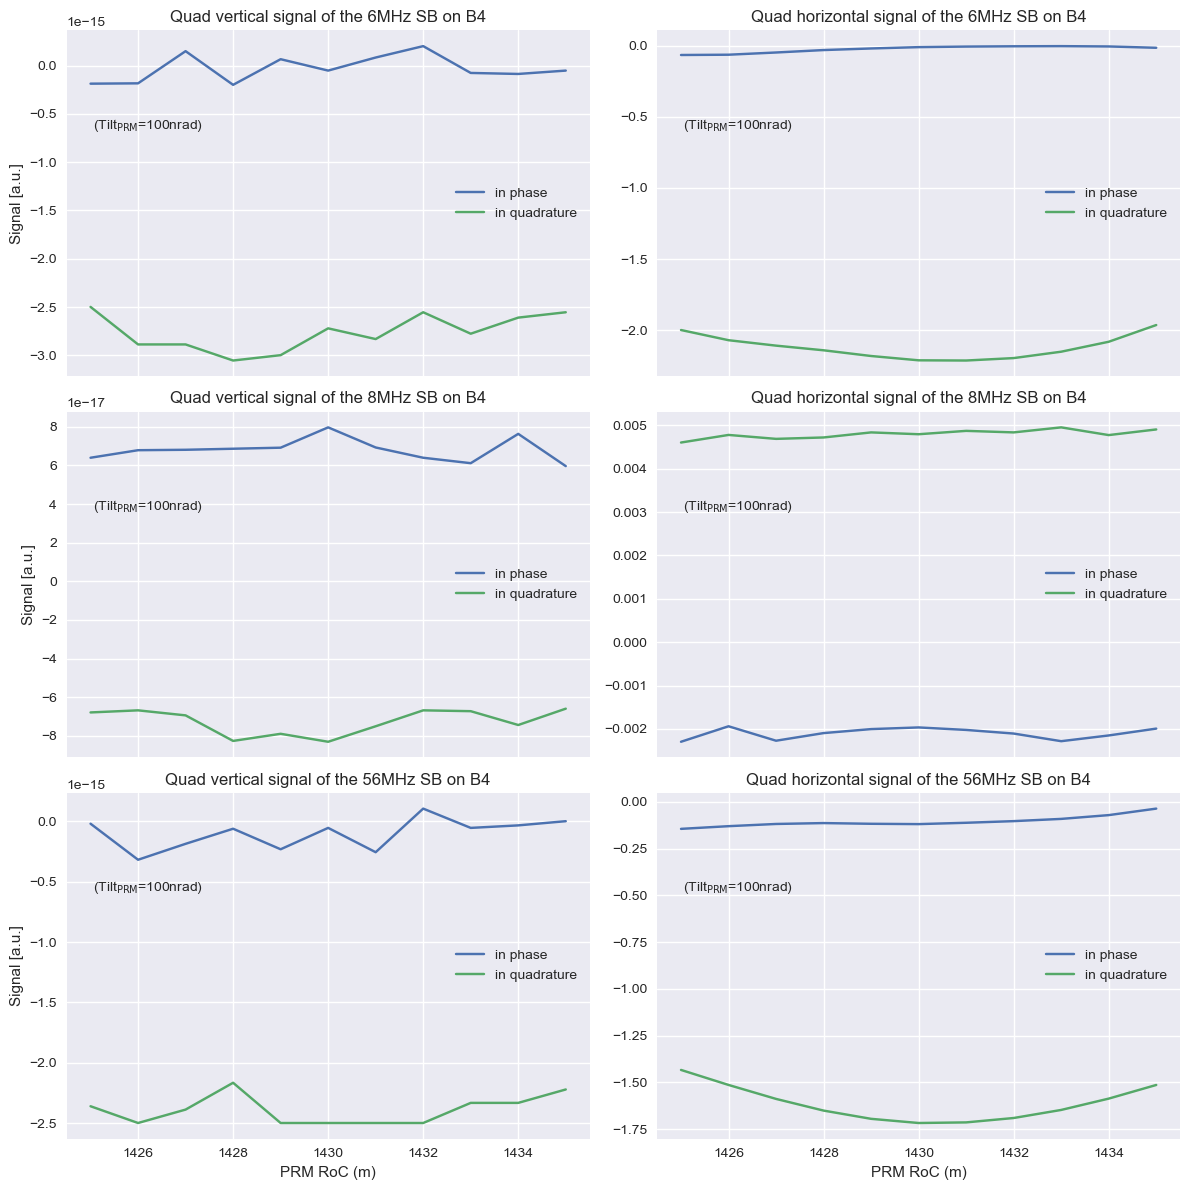

In [16]:
titles = [
    "Quad vertical signal of the 6MHz SB on B4",
    "Quad horizontal signal of the 6MHz SB on B4",
    "Quad vertical signal of the 8MHz SB on B4",
    "Quad horizontal signal of the 8MHz SB on B4",
    "Quad vertical signal of the 56MHz SB on B4",
    "Quad horizontal signal of the 56MHz SB on B4"
]

# Create a 3x2 grid of subplots (3 rows, 2 columns) with shared x-axis
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12), sharex=True)

# Iterate through each subplot, row, and column
for i, ax in enumerate(axes.flatten()):
    # Plot the in-phase and in-quadrature data
    ax.plot(data_quad14_with8MHz[0], data_quad14_with8MHz[1 + 2*i], label="in phase")
    ax.plot(data_quad14_with8MHz[0], data_quad14_with8MHz[2 + 2*i], label="in quadrature")
    
     # Add the text "(PRM_tilt=100nrad)" to the plot
    ax.text(0.05, 0.75, r"(Tilt$_{\mathrm{PRM}}$=100nrad)", transform=ax.transAxes, va='top')
    ax.legend()
    
    # Set the axis labels and title
    if i // 2 == 2:  # Bottom row plots (for a 3x2 grid)
        ax.set_xlabel("PRM RoC (m)")
    if i % 2 == 0:  # Left column plots
        ax.set_ylabel("Signal [a.u.]")
    ax.set_title(titles[i])

# Adjust the layout to avoid overlapping between subplots
plt.tight_layout()

# Display the combined figure with all four subplots
plt.savefig("B4_quadsignals_100nradPRMTilt.png")
plt.show()



**The variable SB_num, used to get the signals, correspond to the order of implementation of the SBs.**

## PDs signals
Data from all the ports, corresponding to the photodiodes signals. Another file, "data/13042023/Quad.txt", stores the same data but with quadrants.

In [29]:
# Read the data file
data=[[],[],[],[],[],[],[],[],[]]
filename="data/20042023/PD.txt"
data_PD13=daf.read_signals(data, filename)

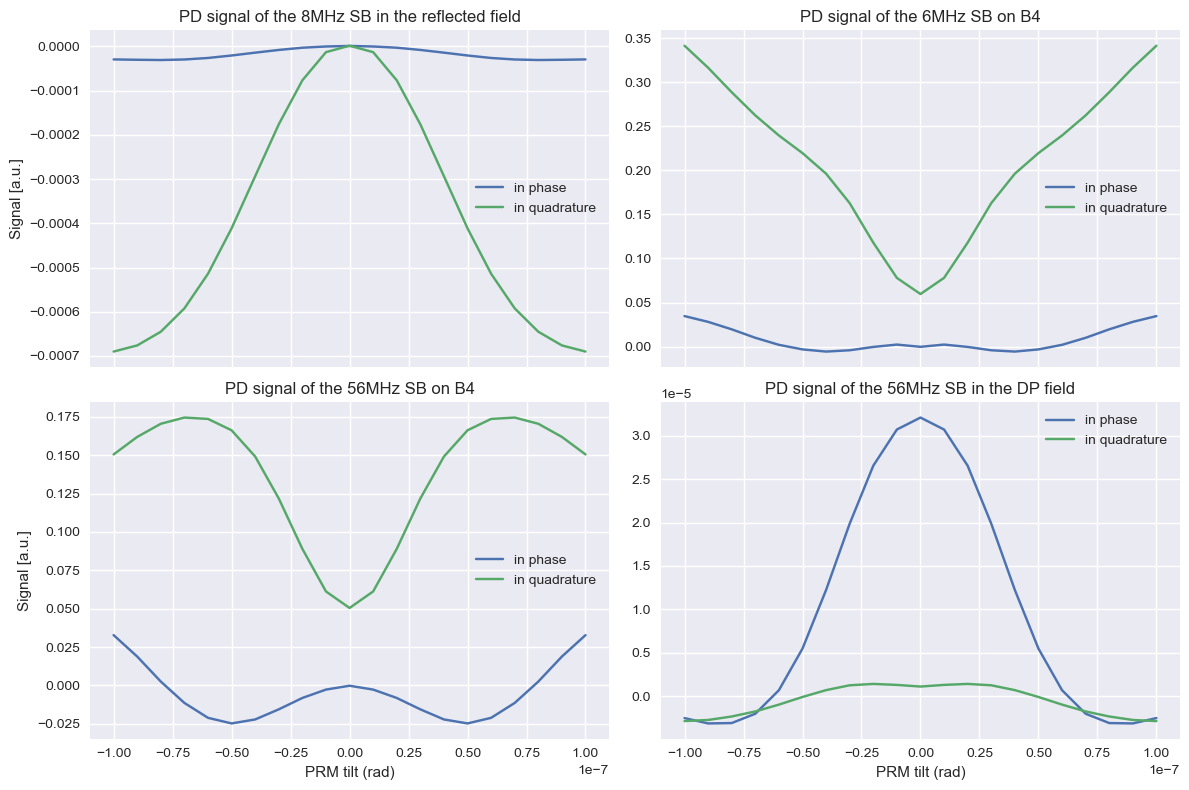

In [30]:
titles = [
    "PD signal of the 8MHz SB in the reflected field",
    "PD signal of the 6MHz SB on B4",
    "PD signal of the 56MHz SB on B4",
    "PD signal of the 56MHz SB in the DP field"
]

# Create a 2x2 grid of subplots (2 rows, 2 columns) with shared x-axis
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8), sharex=True)

# Iterate through each subplot, row, and column
for i, ax in enumerate(axes.flatten()):
    # Plot the in-phase and in-quadrature data
    ax.plot(data_PD13[0], data_PD13[1 + 2*i], label="in phase")
    ax.plot(data_PD13[0], data_PD13[2 + 2*i], label="in quadrature")
    
    # Set the axis labels and title
    if i // 2 == 1:  # Bottom row plots
        ax.set_xlabel("PRM tilt (rad)")
    if i % 2 == 0:  # Left column plots
        ax.set_ylabel("Signal [a.u.]")
    ax.set_title(titles[i])
    ax.legend()

# Adjust the layout to avoid overlapping between subplots
plt.tight_layout()

# Display the combined figure with all four subplots
plt.show()


Now with the RoC of PRM and no tilt.

In [19]:
# Read the data file
data=[[],[],[],[],[],[],[],[],[]]
filename="data/24042023/PD.txt"
data_PD13=daf.read_signals(data, filename)

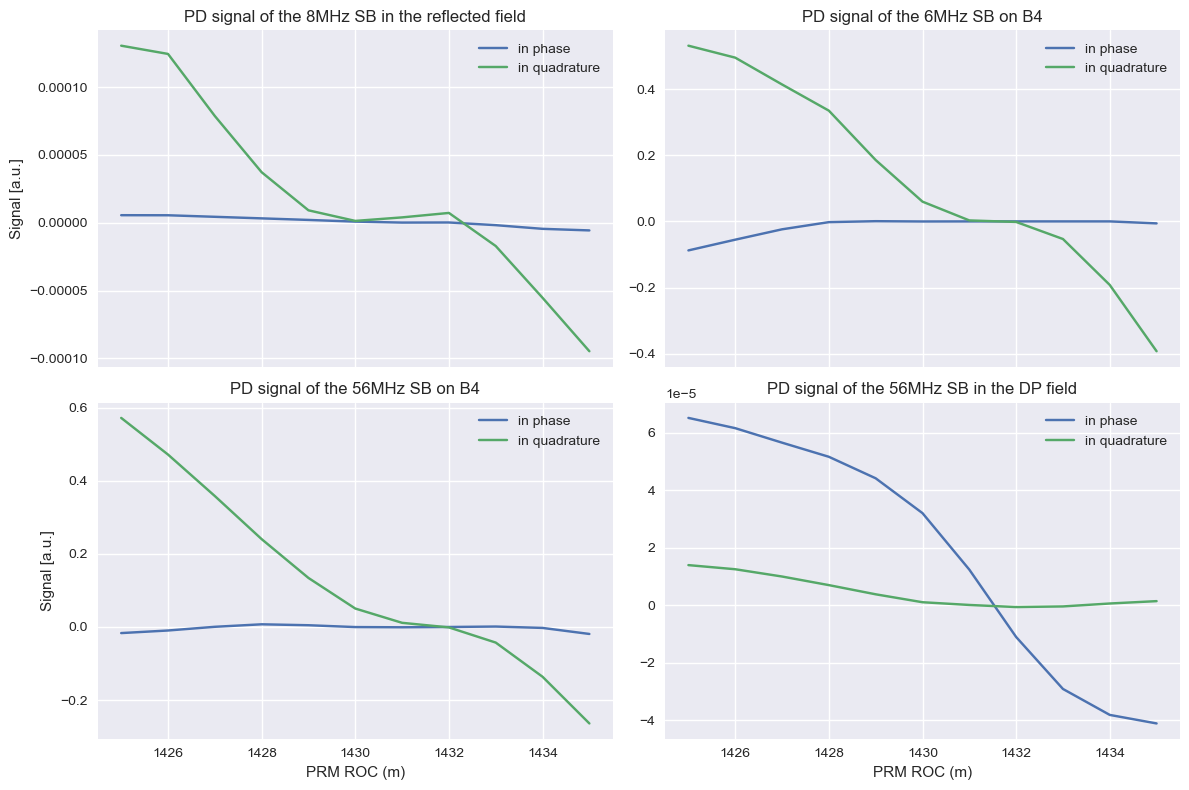

In [20]:
titles = [
    "PD signal of the 8MHz SB in the reflected field",
    "PD signal of the 6MHz SB on B4",
    "PD signal of the 56MHz SB on B4",
    "PD signal of the 56MHz SB in the DP field"
]

# Create a 2x2 grid of subplots (2 rows, 2 columns) with shared x-axis
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8), sharex=True)

# Iterate through each subplot, row, and column
for i, ax in enumerate(axes.flatten()):
    # Plot the in-phase and in-quadrature data
    ax.plot(data_PD13[0], data_PD13[1 + 2*i], label="in phase")
    ax.plot(data_PD13[0], data_PD13[2 + 2*i], label="in quadrature")
    
    # Set the axis labels and title
    if i // 2 == 1:  # Bottom row plots
        ax.set_xlabel("PRM ROC (m)")
    if i % 2 == 0:  # Left column plots
        ax.set_ylabel("Signal [a.u.]")
    ax.set_title(titles[i])
    ax.legend()

# Adjust the layout to avoid overlapping between subplots
plt.tight_layout()

# Display the combined figure with all four subplots
plt.show()


And with the RoC of PRM and a 100nrad tilt on PRM.

In [24]:
# Read the data file
data=[[],[],[],[],[],[],[],[],[]]
filename="data/24042023/PD_withtilt.txt"
data_PD13=daf.read_signals(data, filename)

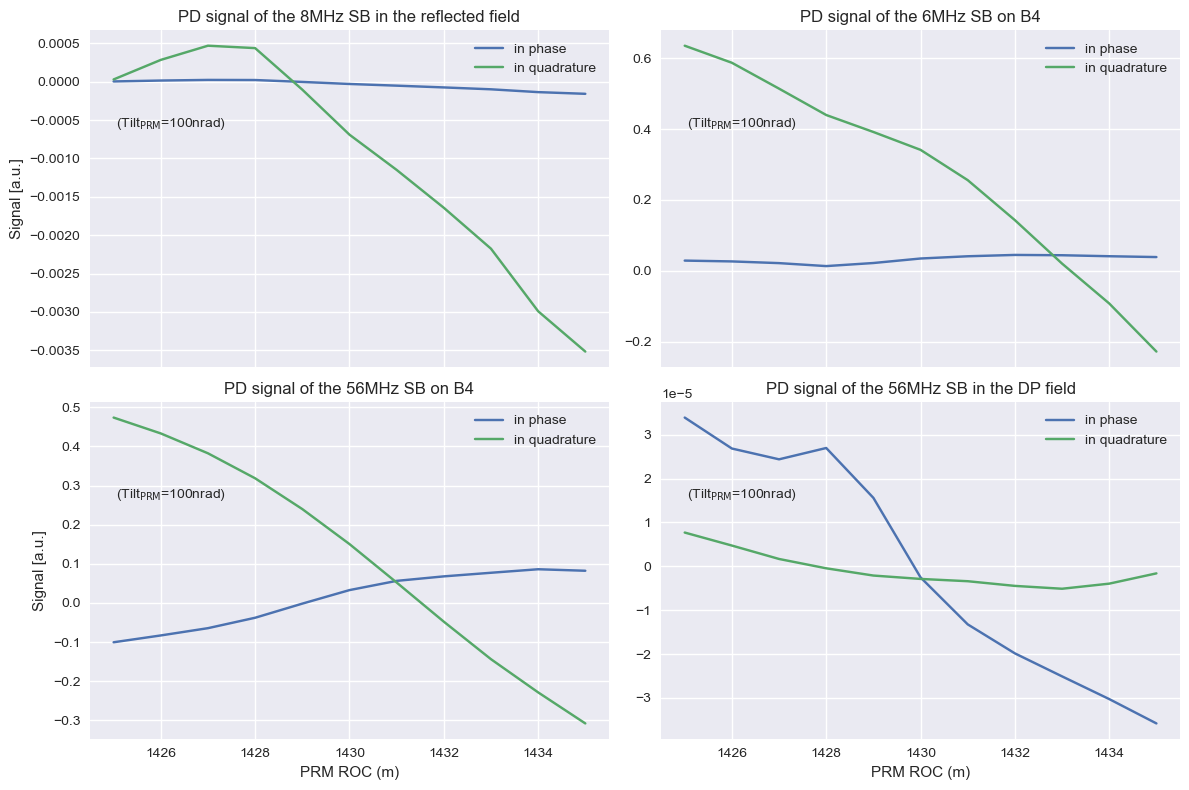

In [25]:
titles = [
    "PD signal of the 8MHz SB in the reflected field",
    "PD signal of the 6MHz SB on B4",
    "PD signal of the 56MHz SB on B4",
    "PD signal of the 56MHz SB in the DP field"
]

# Create a 2x2 grid of subplots (2 rows, 2 columns) with shared x-axis
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8), sharex=True)

# Iterate through each subplot, row, and column
for i, ax in enumerate(axes.flatten()):
    # Plot the in-phase and in-quadrature data
    ax.plot(data_PD13[0], data_PD13[1 + 2*i], label="in phase")
    ax.plot(data_PD13[0], data_PD13[2 + 2*i], label="in quadrature")
    
    ax.text(0.05, 0.75, r"(Tilt$_{\mathrm{PRM}}$=100nrad)", transform=ax.transAxes, va='top')
    
    # Set the axis labels and title
    if i // 2 == 1:  # Bottom row plots
        ax.set_xlabel("PRM ROC (m)")
    if i % 2 == 0:  # Left column plots
        ax.set_ylabel("Signal [a.u.]")
    ax.set_title(titles[i])
    ax.legend()

# Adjust the layout to avoid overlapping between subplots
plt.tight_layout()

# Display the combined figure with all four subplots
plt.show()


## Determination of HOMs power

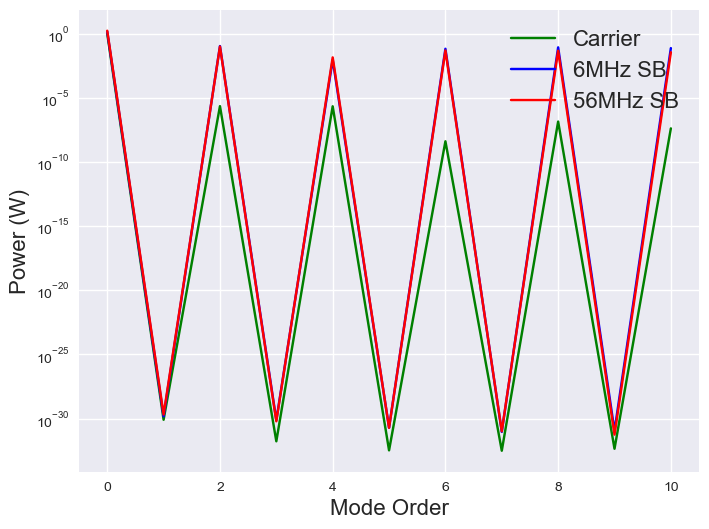

In [11]:
# Read the file content
with open('data/16062023/HOMpower_1410PRMnotilt.txt', 'r') as file:
    file_content = file.read()


# Process the content and store the powers
data = {}
section = None
mode_order = None
power = 0
for line in file_content.split('\n'):
    if "Power of" in line:
        section = line.split(':')[0] + ':'
        if section not in data:
            data[section] = [0] * 11
    elif "Mode order" in line:
        parts = line.split()
        mode_order = int(parts[2])
        power_str = parts[3].replace(',', '') # Remove the comma
        power = float(power_str)
        data[section][mode_order] += power

# Create the plot
plt.figure(figsize=(8, 6))

# Add the data
mode_orders = list(range(11))
carrier_key = 'Power of Carrier HOM with 1410m PRM_RoC (W):'
sb1_key = 'Power of SB1 HOM with 1410m PRM_RoC (W):'
#sb2_key = 'Power of SB2 HOM with 1410m PRM_RoC (W):'
sb3_key = 'Power of SB3 HOM with 1410m PRM_RoC (W):'

plt.plot(mode_orders, data[carrier_key], label='Carrier', color='green')
plt.plot(mode_orders, [data[sb1_key][i] for i in range(11)], label='6MHz SB', color='blue')
#plt.plot(mode_orders, [data[sb2_key][i] for i in range(11)], label='SB2 (Lower + Upper)')
plt.plot(mode_orders, [data[sb3_key][i] for i in range(11)], label='56MHz SB', color='red')

# Add labels and legend
plt.xlabel('Mode Order', fontsize=16)
plt.ylabel('Power (W)', fontsize=16)
#plt.title('Power of HOMs with 1410m PRM_RoC')
plt.legend(loc='upper right', fontsize=16)  # Set legend position to top right
plt.yscale('log')
plt.grid(True)

# Show plot
plt.show()




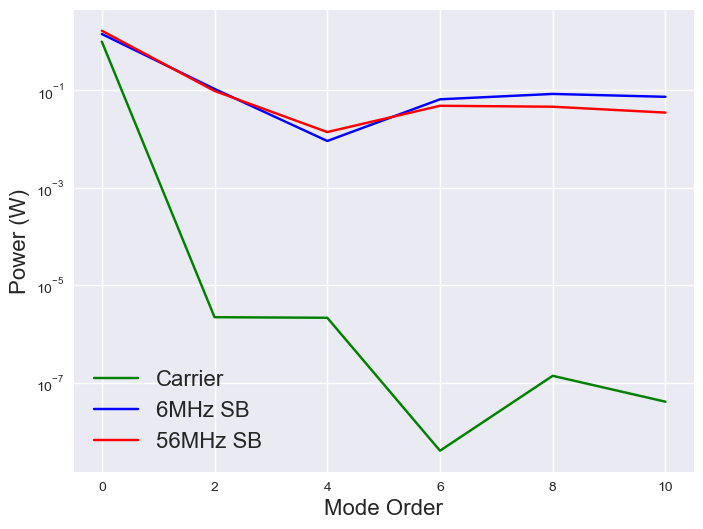

In [12]:
# Read the file content
with open('data/16062023/HOMpower_1410PRMnotilt.txt', 'r') as file:
    file_content = file.read()

# Process the content and store the powers
data = {}
section = None
mode_order = None
power = 0
for line in file_content.split('\n'):
    if "Power of" in line:
        section = line.split(':')[0] + ':'
        if section not in data:
            data[section] = [0] * 11
    elif "Mode order" in line:
        parts = line.split()
        mode_order = int(parts[2])
        power_str = parts[3].replace(',', '') # Remove the comma
        power = float(power_str)
        data[section][mode_order] += power

# Create the plot
plt.figure(figsize=(8, 6))

# Add the data
mode_orders = list(range(0, 11, 2))  # Only even mode orders
carrier_key = 'Power of Carrier HOM with 1410m PRM_RoC (W):'
sb1_key = 'Power of SB1 HOM with 1410m PRM_RoC (W):'
#sb2_key = 'Power of SB2 HOM with 1410m PRM_RoC (W):'
sb3_key = 'Power of SB3 HOM with 1410m PRM_RoC (W):'

plt.plot(mode_orders, [data[carrier_key][i] for i in mode_orders], label='Carrier', color='green')
plt.plot(mode_orders, [data[sb1_key][i] for i in mode_orders], label='6MHz SB', color='blue')
#plt.plot(mode_orders, [data[sb2_key][i] for i in mode_orders], label='SB2 (Lower + Upper)')
plt.plot(mode_orders, [data[sb3_key][i] for i in mode_orders], label='56MHz SB', color='red')

# Add labels and legend
plt.xlabel('Mode Order', fontsize=16)
plt.ylabel('Power (W)', fontsize=16)
#plt.title('Power of HOMs with 1410m PRM_RoC (Even Mode Orders)')
plt.legend(fontsize=16)
plt.grid(True)

# Set y-axis to logarithmic scale
plt.yscale('log')

# Show plot
plt.show()


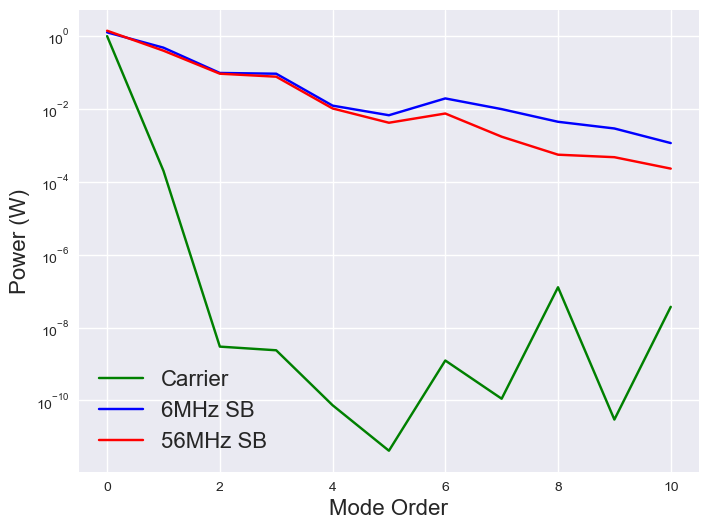

In [14]:
# Read the file content
with open('data/16062023/HOMpower_1430PRM100tilt.txt', 'r') as file:
    file_content = file.read()


# Process the content and store the powers
data = {}
section = None
mode_order = None
power = 0
for line in file_content.split('\n'):
    if "Power of" in line:
        section = line.split(':')[0] + ':'
        if section not in data:
            data[section] = [0] * 11
    elif "Mode order" in line:
        parts = line.split()
        mode_order = int(parts[2])
        power_str = parts[3].replace(',', '') # Remove the comma
        power = float(power_str)
        data[section][mode_order] += power

# Create the plot
plt.figure(figsize=(8, 6))

# Add the data
mode_orders = list(range(11))
carrier_key = 'Power of Carrier HOM with 100nrad tilt on PRM (W):'
sb1_key = 'Power of SB1 HOM with 100nrad tilt on PRM (W):'
#sb2_key = 'Power of SB2 HOM with 100nrad tilt on PRM (W):'
sb3_key = 'Power of SB3 HOM with 100nrad tilt on PRM (W):'

plt.plot(mode_orders, data[carrier_key], label='Carrier', color='green')
plt.plot(mode_orders, [data[sb1_key][i] for i in range(11)], label='6MHz SB', color='blue')
#plt.plot(mode_orders, [data[sb2_key][i] for i in range(11)], label='SB2 (Lower + Upper)')
plt.plot(mode_orders, [data[sb3_key][i] for i in range(11)], label='56MHz SB', color='red')

# Add labels and legend
plt.xlabel('Mode Order', fontsize=16)
plt.ylabel('Power (W)', fontsize=16)
#plt.title('Power of HOMs with 100nrad tilt on PRM')
plt.legend(fontsize=16)
plt.yscale('log')
plt.grid(True)

# Show plot
plt.show()